In [1]:
from fastdtw import fastdtw
import numpy as np
import numpy
import math
import os
from scipy.spatial.distance import euclidean
import sys

In [2]:
import os
directory ='/Users/kundan/Desktop/sample1/'
txt_files = []
for file in os.listdir(directory):
    if file.endswith('.TXT'):
        txt_files.append(file)
print(txt_files)

['U17S36.TXT', 'U17S22.TXT', 'U19S27.TXT', 'U10S17.TXT', 'U19S33.TXT', 'U38S16.TXT', 'U31S6.TXT', 'U31S32.TXT', 'U17S5.TXT', 'U31S26.TXT', 'U3S12.TXT', 'U4S33.TXT', 'U4S27.TXT', 'U36S13.TXT', 'U21S23.TXT', 'U33S4.TXT', 'U28S13.TXT', 'U21S37.TXT', 'U15S7.TXT', 'U26S16.TXT', 'U28S7.TXT', 'U9S6.TXT', 'U26S8.TXT', 'U23S26.TXT', 'U13S1.TXT', 'U23S32.TXT', 'U35S2.TXT', 'U7S9.TXT', 'U24S13.TXT', 'U15S33.TXT', 'U15S27.TXT', 'U40S26.TXT', 'U40S32.TXT', 'U12S12.TXT', 'U11S3.TXT', 'U33S37.TXT', 'U8S27.TXT', 'U1S17.TXT', 'U8S33.TXT', 'U33S23.TXT', 'U6S36.TXT', 'U34S16.TXT', 'U6S22.TXT', 'U34S17.TXT', 'U6S23.TXT', 'U6S37.TXT', 'U1S16.TXT', 'U33S22.TXT', 'U37S1.TXT', 'U8S32.TXT', 'U8S26.TXT', 'U33S36.TXT', 'U11S2.TXT', 'U12S13.TXT', 'U40S33.TXT', 'U40S27.TXT', 'U15S26.TXT', 'U15S32.TXT', 'U24S12.TXT', 'U7S8.TXT', 'U35S3.TXT', 'U23S33.TXT', 'U23S27.TXT', 'U26S9.TXT', 'U9S7.TXT', 'U28S6.TXT', 'U26S17.TXT', 'U28S12.TXT', 'U15S6.TXT', 'U21S36.TXT', 'U33S5.TXT', 'U21S22.TXT', 'U4S26.TXT', 'U36S12.TXT', '

In [3]:
def interpolate_list(original_list, target_length):
    ratio = (len(original_list) - 1) / (target_length - 1)
    interpolated_list = []
    for i in range(target_length):
        index = i * ratio
        lower_index = int(index)
        upper_index = min(lower_index + 1, len(original_list) - 1)

        # Linear interpolation between adjacent values
        if lower_index == upper_index:
            interpolated_list.append(original_list[lower_index])
        else:
            fraction = index - lower_index
            interpolated_value = (1 - fraction) * original_list[lower_index] + fraction * original_list[upper_index]
            interpolated_list.append(interpolated_value)

    return interpolated_list

In [4]:
def dba(xeb,x_final,m_mean):
    arr=[[]]*m_mean
    assoc=[]
    for i in range(len(x_final[0])):
            arr[i]=[]
    for i in range(len(x_final)):
        s1=x_final[i]
        dtw_distance, warp_path = fastdtw(xeb,s1, dist=euclidean)
        for i in warp_path:
            r,c=i
            k=s1[c]
            arr[r].append(k)
        
    for i in arr:
         assoc.append(numpy.average(i))
    return assoc

In [5]:
def final(assoc,x_final):
    l=[]
    for i in range(len(x_final)):
        dtw_distance, warp_path = fastdtw(assoc, x_final[i], dist=euclidean)
        l.append(dtw_distance)
    return l

In [6]:
def biometric(p):
    directory = '/Users/kundan/Desktop/sample1/'
    txt_files = []
    for file in os.listdir(directory):
        if file.endswith('.TXT'):
            txt_files.append(file)
    k=[]
    m=[]

    z=1
    while(True):
        w=[]
        t='U'+str(p)+'S'+str(z)+'.TXT'
        s= '/Users/kundan/Desktop/sample1/'+t
        f = open(s, "r")
        count=0
        for i in f:
            if(count==0):
                count+=1
                m.append(int(i[0:-1]))


                continue
            w.append(i[0:-1])
        k.append(w)
        z+=1

        if(z==21):
           break
    k_f=[]
    m_f=[]

    z=21
    while(True):
        w=[]
        t='U'+str(p)+'S'+str(z)+'.TXT'

        s= '/Users/kundan/Desktop/sample1/'+t
        f = open(s, "r")
        count=0
        for i in f:
            if(count==0):
                count+=1
                m_f.append(int(i[0:-1]))


                continue
            w.append(i[0:-1])
        k_f.append(w)
        z+=1

        if(z==41):
           break
    m_mean=int(numpy.average(m))
    print(m_mean)
    m_mean_f=int(numpy.average(m_f))
    m_mean_f
    b=[]
    c=[]
    for l in k:
        a=[]
        for m in l:
            s=m.split()
            s.pop(2)
            s.pop(2)
            s.pop(2)
            s.pop(2)
            c=[]
            for i in s:
                tem=int(i)
                c.append(tem)
            a.append(c)
        b.append(a)
    b_f=[]
    c_f=[]
    for l in k_f:
        a=[]
        for m in l:
            s=m.split()
            s.pop(2)
            s.pop(2)
            s.pop(2)
            s.pop(2)
            c_f=[]
            for i in s:
                tem=int(i)
                c_f.append(tem)
            a.append(c_f)
        b_f.append(a)
    maximum=[]
    maximum_y=[]
    maximum_z=[]
    minimum=[]
    minimum_y=[]
    minimum_z=[]
    mean=[]
    mean_y=[]
    mean_z=[]
    for i in b:
        l_x=[]
        l_y=[]
        l_z=[]
        for j in i:
            l_x.append(j[0])
            l_y.append(j[1])
            l_z.append(j[2])
        maximum.append(max(l_x))
        minimum.append(min(l_x))
        mean.append(numpy.average(l_x))
        maximum_y.append(max(l_y))
        minimum_y.append(min(l_y))
        mean_y.append(numpy.average(l_y))
        maximum_z.append(max(l_z))
        minimum_z.append(min(l_z))
        mean_z.append(numpy.average(l_z))
    maximum_f=[]
    minimum_f=[]
    maximum_y_f=[]
    maximum_z_f=[]
    minimum_y_f=[]
    minimum_z_f=[]

    mean_f=[]
    mean_y_f=[]
    mean_z_f=[]
    for i in b_f:
        l_x_f=[]
        l_y_f=[]
        l_z_f=[]
        for j in i:
            l_x_f.append(j[0])
            l_y_f.append(j[1])
            l_z_f.append(j[2])
        maximum_f.append(max(l_x_f))
        minimum_f.append(min(l_x_f))
        mean_f.append(numpy.average(l_x_f))
        maximum_y_f.append(max(l_y_f))
        minimum_y_f.append(min(l_y_f))
        mean_y_f.append(numpy.average(l_y_f))
        maximum_z_f.append(max(l_z_f))
        minimum_z_f.append(min(l_z_f))
        mean_z_f.append(numpy.average(l_z_f))
    new_x=[]
    new_y=[]
    new_z=[]
    new_tangent=[]
    new_velocity=[]
    new_log=[]
    new_acc=[]
    for i in b:
        count=0
        p=[]
        q=[]
        r=[]
        t=[]
        v=[]
        l=[]
        a=[]
        for j in i:
            j[0]=(j[0]-mean[count])/(maximum[count]-minimum[count])
            p.append(j[0])
            g=j[0]
            j[1]=(j[1]-mean_y[count])/(maximum_y[count]-minimum_y[count])
            h=j[1]
            q.append(j[1])
            t1=math.atan(h/g)
            t.append(t1)
            v1=(g**2 + h**2)**0.5
            v.append(v1)
            l1=math.log(v1/abs(t1))
            l.append(l1)
            a1=(v1**2 + (v1*t1)**2)**0.5
            a.append(a1)
            j[2]=(j[2]-mean_z[count])/(maximum_z[count]-minimum_z[count])
            r.append(j[2])
        count+=1
        new_x.append(p)

        new_y.append(q)
        new_z.append(r)
        new_tangent.append(t)
        new_velocity.append(v)
        new_log.append(l)
        new_acc.append(a)
    new_x_f=[]
    new_y_f=[]
    new_z_f=[]
    new_tangent_f=[]
    new_velocity_f=[]
    new_log_f=[]
    new_acc_f=[]
    for i in b_f:
        count=0
        p=[]
        q=[]
        r=[]
        t=[]
        v=[]
        l=[]
        a=[]
        for j in i:
            j[0]=(j[0]-mean_f[count])/(maximum_f[count]-minimum_f[count])
            g=j[0]
            p.append(j[0])
            j[1]=(j[1]-mean_y_f[count])/(maximum_y_f[count]-minimum_y_f[count])
            h=j[1]
            q.append(j[1])
            t1=math.atan(h/g)
            t.append(t1)
            v1=(h**2 + g**2)**0.5
            v.append(v1)
            if(t1==0):
                t1=0.001
            l1=math.log(v1/abs(t1))
            l.append(l1)
            a1=(v1**2 + (v1*t1)**2)**0.5
            a.append(a1)
            j[2]=(j[2]-mean_z_f[count])/(maximum_z_f[count]-minimum_z_f[count])
            r.append(j[2])
        count+=1
        new_x_f.append(p)
        new_y_f.append(q)
        new_z_f.append(r)
        new_tangent_f.append(t)
        new_velocity_f.append(v)
        new_log_f.append(l)
        new_acc_f.append(a)
    x_final=[]
    y_final=[]
    z_final=[]
    new_tangent_final=[]
    new_velocity_final=[]
    new_log_final=[]
    new_acc_final=[]
    for i in range(len(new_x)):
        outp=[]
        inp = new_x[i]
        new_len = m_mean
        outp = interpolate_list(inp, new_len)
        x_final.append(outp)
    for i in range(len(new_y)):
        outp=[]
        inp = new_y[i]
        new_len = m_mean

        outp = interpolate_list(inp, new_len)
        y_final.append(outp)
    for i in range(len(new_z)):
        outp=[]
        inp = new_z[i]
        new_len = m_mean

        outp = interpolate_list(inp, new_len)
        z_final.append(outp)

    for i in range(len(new_tangent)):
        outp=[]
        inp = new_tangent[i]
        new_len = m_mean

        outp = interpolate_list(inp, new_len)
        new_tangent_final.append(outp)
    for i in range(len(new_velocity)):
        outp=[]
        inp = new_velocity[i]
        new_len = m_mean

        outp = interpolate_list(inp, new_len)
        new_velocity_final.append(outp)
    for i in range(len(new_log)):
        outp=[]
        inp = new_log[i]
        new_len = m_mean

        outp = interpolate_list(inp, new_len)
        new_log_final.append(outp)
    for i in range(len(new_acc)):
        outp=[]
        inp = new_acc[i]
        new_len = m_mean
        outp = interpolate_list(inp, new_len)
        new_acc_final.append(outp)
    x_final_f=[]
    y_final_f=[]
    xeb=[]
    yeb=[]
    zeb=[]
    teb=[]
    veb=[]
    leb=[]
    aceb=[]
    s=int(m_mean)
    for i in range(int(m_mean)):
        x=[]
        y=[]
        z=[]
        tan=[]
        acc=[]
        vel=[]
        log=[]
        for j in range(len(x_final)):
            x.append(x_final[j][i])
            y.append(y_final[j][i])
            z.append(z_final[j][i])
            acc.append(new_acc_final[j][i])
            tan.append(new_tangent_final[j][i])
            vel.append(new_velocity_final[j][i])
            log.append(new_log_final[j][i])
        xeb.append(numpy.average(x))
        yeb.append(numpy.average(y))
        teb.append(numpy.average(tan))
        veb.append(numpy.average(vel))
        leb.append(numpy.average(log))
        aceb.append(numpy.average(acc))
        zeb.append(numpy.average(z))
    assoc_x=dba(xeb,x_final,s)
    assoc_y=dba(yeb,y_final,s)
    assoc_tangent=dba(teb,new_tangent_final,s)
    assoc_log=dba(leb,new_log_final,s)
    assoc_velocity=dba(veb,new_velocity_final,s)
    assoc_acc=dba(aceb,new_acc_final,s)
    assoc_z=dba(zeb,z_final,s)
    acc=final(assoc_acc,new_acc_f)
    return xeb,[assoc_x,assoc_y,assoc_z,assoc_tangent,assoc_velocity,assoc_log,assoc_acc],[new_x,new_y,new_z,new_tangent,new_velocity,new_log,new_acc],[new_x_f,new_y_f,new_z_f,new_tangent_f,new_velocity_f,new_log_f,new_acc_f]


In [7]:
o=[]
f=[]
for i in range(1,41):
    xeb,a,b,c=biometric(i)
    list1 =[list(t) for t in zip(a[0],a[1],a[2],a[3],a[4],a[5],a[6])]
    oo=[]
    for i in range(len(b[0])):
        list2 =[list(t) for t in zip(b[0][i],b[1][i],b[2][i],b[3][i],b[4][i],b[5][i],b[6][i])]
        dtw_distance, warp_path = fastdtw(list1,list2, dist=euclidean)
        oo.append(dtw_distance)
    o.append(oo)
    ff=[]
    for i in range(len(b[0])):
        list2 =[list(t) for t in zip(c[0][i],c[1][i],c[2][i],c[3][i],c[4][i],c[5][i],c[6][i])]
        dtw_distance, warp_path = fastdtw(list1,list2, dist=euclidean)
        ff.append(dtw_distance)
    f.append(ff)

96
124
126
177
179
184
221
179
285
145
125
192
257
225
272
197
503
250
181
117
163
171
345
154
116
188
173
133
175
138
153
178
132
143
220
106
97
106
190
239


In [8]:
o

[[41.913493909828055,
  96.47371550717448,
  79.83627788852563,
  51.57374086428278,
  124.27104996260903,
  54.14032239398856,
  64.24855307205591,
  72.53804406418121,
  65.48214449505677,
  44.650005732073076,
  50.70813910438886,
  70.1140679313114,
  35.126504554330836,
  69.15594172601858,
  60.60120279952097,
  60.599581717344954,
  62.564300447358036,
  70.53421298947364,
  59.54532226812396,
  69.84904488904081],
 [88.9699234464169,
  80.2130134478906,
  56.22929612868797,
  120.94614702286347,
  110.88564388519549,
  71.02876401265506,
  80.44446746635734,
  100.07300519997884,
  57.36651833873761,
  57.596834879375926,
  110.72052203435597,
  51.40755411310202,
  69.91097348694379,
  63.63567467023203,
  79.17793139014351,
  74.26874224099656,
  59.66564034719331,
  109.30024779025509,
  75.88104636963234,
  79.26539560667632],
 [78.73142798077826,
  70.68205408821225,
  84.2095293897743,
  90.7738023849988,
  90.01200748870292,
  70.95674925847317,
  97.83952986759294,
  66

In [9]:
f

[[67.53970822459337,
  119.42117203195458,
  97.46372396412052,
  95.66661407104269,
  162.371372101071,
  165.8788666077849,
  178.43939661498848,
  161.25681127993303,
  164.1692713836638,
  167.59462011391648,
  161.92804028467285,
  155.58370503367507,
  208.11886439801694,
  241.65421857713696,
  277.52217808669536,
  255.63474289214432,
  185.12447444574101,
  181.21345790360735,
  247.88230658761788,
  255.30929015768442],
 [99.43317141566561,
  131.04351051823048,
  106.05269873113306,
  91.29975874745881,
  235.36724529565888,
  150.1869572729514,
  158.7130373398081,
  129.9972011053017,
  143.42065814988985,
  187.18551958851205,
  162.49506767613448,
  163.19609955227466,
  252.61045991600642,
  197.2970327205081,
  310.33095152957014,
  231.67593749395928,
  81.62811115646153,
  81.90466707861404,
  250.98081712996412,
  299.04252667690434],
 [76.58481135834735,
  90.73929159425035,
  93.25710573940124,
  86.41400561737079,
  232.27225813020246,
  207.09793313626346,
  161

In [42]:
t=[]
for i in o:
    t.append(math.ceil((max(i)+min(i))/2))
t


[80,
 87,
 95,
 143,
 143,
 150,
 181,
 131,
 372,
 189,
 159,
 204,
 214,
 203,
 230,
 129,
 320,
 147,
 162,
 124,
 104,
 120,
 319,
 107,
 141,
 203,
 82,
 105,
 192,
 129,
 132,
 179,
 125,
 112,
 180,
 130,
 106,
 134,
 151,
 123]

In [43]:
len(t)

40

In [44]:
c=0
a=[]
for i in f:
    s=t[c]
    ia=[]
    for j in i:
        if(j>s):
            ia.append("forgery")
        else:
            ia.append("genuine")
    a.append(ia)
    c+=1

In [45]:
c=0
b=[]
for i in o:
    s=t[c]
    ib=[]
    for j in i:
        if(j>s):
            ib.append("forgery")
        else:
            ib.append("genuine")
    b.append(ib)
    c+=1

In [46]:
b

[['genuine',
  'forgery',
  'genuine',
  'genuine',
  'forgery',
  'genuine',
  'genuine',
  'genuine',
  'genuine',
  'genuine',
  'genuine',
  'genuine',
  'genuine',
  'genuine',
  'genuine',
  'genuine',
  'genuine',
  'genuine',
  'genuine',
  'genuine'],
 ['forgery',
  'genuine',
  'genuine',
  'forgery',
  'forgery',
  'genuine',
  'genuine',
  'forgery',
  'genuine',
  'genuine',
  'forgery',
  'genuine',
  'genuine',
  'genuine',
  'genuine',
  'genuine',
  'genuine',
  'forgery',
  'genuine',
  'genuine'],
 ['genuine',
  'genuine',
  'genuine',
  'genuine',
  'genuine',
  'genuine',
  'forgery',
  'genuine',
  'forgery',
  'forgery',
  'genuine',
  'forgery',
  'genuine',
  'genuine',
  'genuine',
  'genuine',
  'genuine',
  'forgery',
  'forgery',
  'genuine'],
 ['genuine',
  'forgery',
  'forgery',
  'forgery',
  'genuine',
  'genuine',
  'genuine',
  'genuine',
  'genuine',
  'forgery',
  'forgery',
  'forgery',
  'genuine',
  'forgery',
  'genuine',
  'genuine',
  'genuin

In [47]:
TP=0
TN=0
FN=0
FP=0
TPL=[]
TNL=[]
FNL=[]
FPL=[]
for i in b:
    l=0
    m=0
    for j in i:
        if(j=='genuine'):
            TP+=1
            l+=1
        else:
            FN+=1
            m+=1
    TPL.append(l)
    FNL.append(m)
for i in a:
    for j in i:
        l=0
        m=0
        if(j=="forgery"):
            TN+=1
            l+=1
        else:
            FP+=1
            m+=1
    TNL.append(l)
    FPL.append(m)

In [48]:
len(b)

40

In [49]:
for i in a:
    for j in i:
        if(j=="forgery"):
            TN+=1
        else:
            FP+=1
            

In [90]:
print("The accuracy is : ",(TN+TP)/(TN+TP+FP+FN))
print("The recall is :",(TP)/(TP+FN))
print("The precision is :",TP/(TP+FP))
print("The FAR  is :",(FP)/(FP+TN))
print("The FRR  is : ",(FN)/(FN+TP))
print("The eer is : ",((FP)/(FP+TN))+((FN)/(FN+TP))/2)

The accuracy is :  0.8675
The recall is : 0.745
The precision is : 0.8394366197183099
The FAR  is : 0.07125
The FRR  is :  0.255
The eer is :  0.19874999999999998


In [91]:
fr=[]
fa=[]
for i in range(len(a)):
    print("The {} st user accuracy  is : {} ".format(i+1,(TNL[i]+TPL[i])/(TNL[i]+TPL[i]+FPL[i]+FNL[i])))
    print("The {} st user recall  is : {} ".format(i+1,(TPL[i])/(TPL[i]+FNL[i])))
    print("The {} st user precision  is : {} ".format(i+1,(TPL[i])/(TPL[i]+FPL[i])))
    fa.append((FPL[i])/(FPL[i]+TNL[i]))
    print("The {} st user FAR  is : {} ".format(i+1,(FPL[i])/(FPL[i]+TNL[i])))
    fr.append((FNL[i])/(FNL[i]+TPL[i]))
    print("The {} st user FRR  is : {} ".format(i+1,(FNL[i])/(FNL[i]+TPL[i])))

The 1 st user accuracy  is : 0.9047619047619048 
The 1 st user recall  is : 0.9 
The 1 st user precision  is : 1.0 
The 1 st user FAR  is : 0.0 
The 1 st user FRR  is : 0.1 
The 2 st user accuracy  is : 0.7142857142857143 
The 2 st user recall  is : 0.7 
The 2 st user precision  is : 1.0 
The 2 st user FAR  is : 0.0 
The 2 st user FRR  is : 0.3 
The 3 st user accuracy  is : 0.7142857142857143 
The 3 st user recall  is : 0.7 
The 3 st user precision  is : 1.0 
The 3 st user FAR  is : 0.0 
The 3 st user FRR  is : 0.3 
The 4 st user accuracy  is : 0.6666666666666666 
The 4 st user recall  is : 0.65 
The 4 st user precision  is : 1.0 
The 4 st user FAR  is : 0.0 
The 4 st user FRR  is : 0.35 
The 5 st user accuracy  is : 0.9047619047619048 
The 5 st user recall  is : 0.9 
The 5 st user precision  is : 1.0 
The 5 st user FAR  is : 0.0 
The 5 st user FRR  is : 0.1 
The 6 st user accuracy  is : 0.8095238095238095 
The 6 st user recall  is : 0.85 
The 6 st user precision  is : 0.94444444444444

In [92]:
fr,fa

([0.1,
  0.3,
  0.3,
  0.35,
  0.1,
  0.15,
  0.1,
  0.45,
  0.2,
  0.1,
  0.3,
  0.1,
  0.4,
  0.1,
  0.1,
  0.3,
  0.05,
  0.45,
  0.3,
  0.05,
  0.2,
  0.55,
  0.05,
  0.4,
  0.3,
  0.4,
  0.1,
  0.1,
  0.15,
  0.3,
  0.2,
  0.1,
  0.1,
  0.1,
  0.2,
  0.4,
  0.4,
  0.9,
  0.4,
  0.55],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0])

In [93]:
for i in range(len(fa)):
    eer.append((fa[i]+fr[i])/2)

In [94]:
eer ## of each user

[0.05,
 0.15,
 0.15,
 0.175,
 0.05,
 0.575,
 0.05,
 0.225,
 0.1,
 0.05,
 0.65,
 0.05,
 0.2,
 0.05,
 0.05,
 0.15,
 0.025,
 0.225,
 0.15,
 0.025,
 0.1,
 0.275,
 0.025,
 0.2,
 0.15,
 0.2,
 0.05,
 0.05,
 0.075,
 0.15,
 0.1,
 0.05,
 0.05,
 0.05,
 0.1,
 0.2,
 0.2,
 0.95,
 0.2,
 0.275,
 0.05,
 0.15,
 0.15,
 0.175,
 0.05,
 0.575,
 0.05,
 0.225,
 0.1,
 0.05,
 0.65,
 0.05,
 0.2,
 0.05,
 0.05,
 0.15,
 0.025,
 0.225,
 0.15,
 0.025,
 0.1,
 0.275,
 0.025,
 0.2,
 0.15,
 0.2,
 0.05,
 0.05,
 0.075,
 0.15,
 0.1,
 0.05,
 0.05,
 0.05,
 0.1,
 0.2,
 0.2,
 0.95,
 0.2,
 0.275]

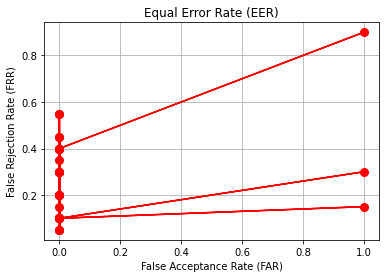

In [95]:
import matplotlib.pyplot as plt
plt.plot(fa, fr, marker='o', markersize=8, color="red", label='EER')
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('Equal Error Rate (EER)')
plt.grid(True)
plt.show()